##  Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

## non optimize system

## Optimize system

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [9]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k = 0.0532;
el_link = 0.0

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[-0.5, -0.5, -0.5, -0.5, 0-0.5, -0.5]

p = SA[a, b, c, d,
        s, xr, r, I, xv, k, el_link]


p = [a, b, c, d, s, xr, r, I, xv, k, el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );
ds_HR1

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0532, 0.0]

In [10]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0532, 0.0]

In [11]:
tr = trajectory(ds_HR1, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

xsum = tr[:, 1] + tr[:, 4]
xsum = xsum[floor(Int, length(xsum) / 2):end ];
x1 = tr[:, 1]
y1 = tr[:, 2]
z1 = tr[:, 3];
x1 = x1[floor(Int, length(x1) / 2):end ];
y1 = y1[floor(Int, length(y1) / 2):end ];
z1 = z1[floor(Int, length(z1) / 2):end ];

In [12]:
tr1 = trajectory(ds_HR2, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

# xsum1 = tr1[:, 1] + tr1[:, 4]
# xsum1 = xsum1[floor(Int, length(xsum1) / 2):end ];
x11 = tr1[:, 1]
y11 = tr1[:, 2]
z11 = tr1[:, 3];
x11 = x11[floor(Int, length(x11) / 2):end ];
y11 = y11[floor(Int, length(y11) / 2):end ];
z11 = z11[floor(Int, length(z11) / 2):end ];

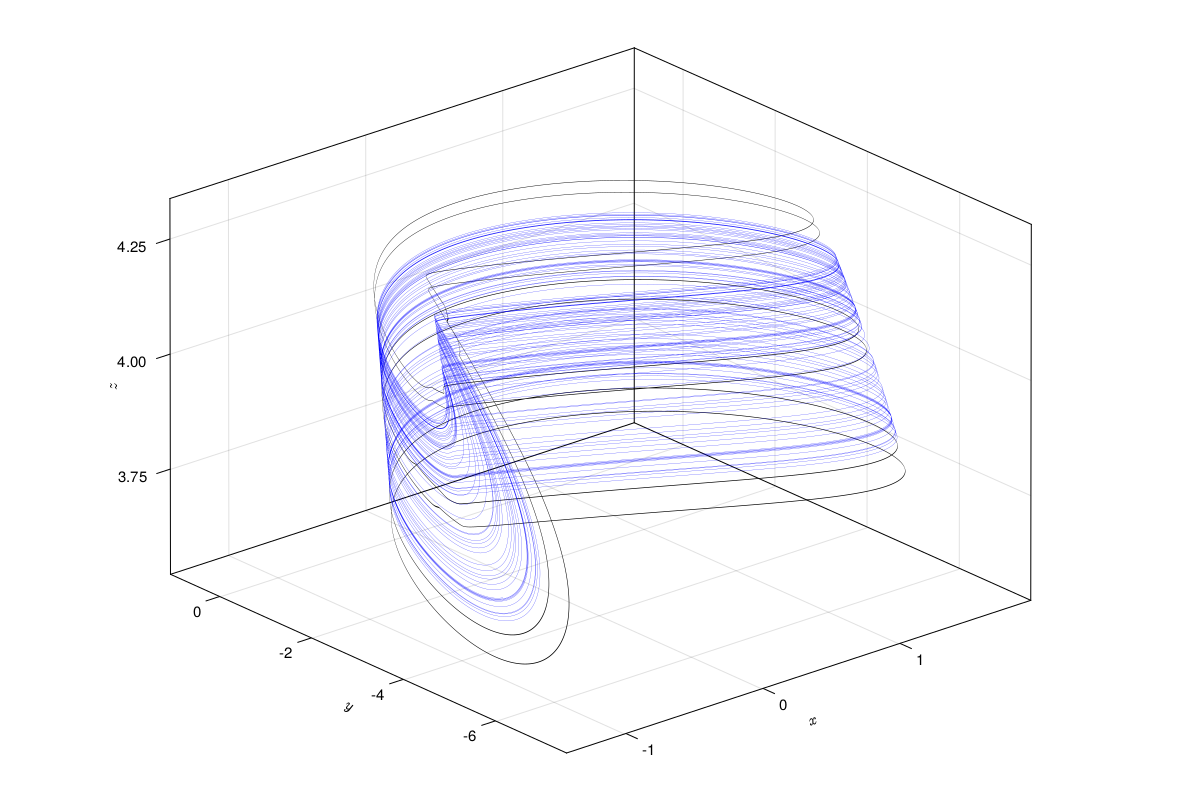

In [19]:
f = Figure(resolution = (1200, 800), fontsize = 15)
ts, tf = 1, 200000
ax = Axis3(f[1, 1], xlabel = L"x", ylabel = L"y", zlabel = L"z")
lines!(ax, x1[ts:tf], y1[ts:tf], z1[ts:tf], linewidth = 0.2, color = "black" )
lines!(ax, x11[ts:tf], y11[ts:tf], z11[ts:tf], linewidth = 0.2, color = "blue" )

f

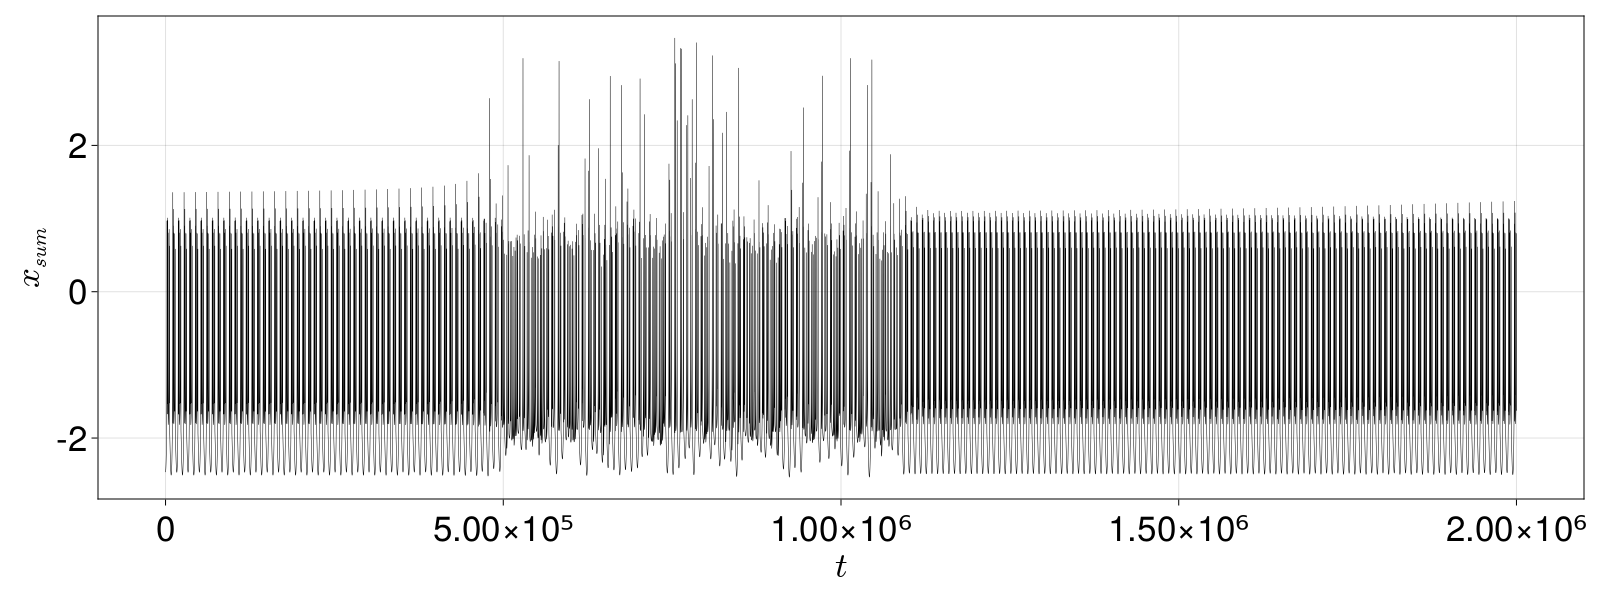

In [20]:
f = Figure(resolution = (1600, 600), fontsize = 35)
ax = Axis(f[1, 1], xlabel = L"t", ylabel = L"x_{sum}")
lines!(xsum[1:2000000], linewidth = 0.5, color = "black" )
f

┌ Warning: Direct propagation of keyword arguments to DifferentialEquations.jl is deprecated.
│ From now on pass any DiffEq-related keywords as a `NamedTuple` using the
│ explicit keyword `diffeq` instead.
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\poincare.jl:106
┌ Warning: Direct propagation of keyword arguments to DifferentialEquations.jl is deprecated.
│ From now on pass any DiffEq-related keywords as a `NamedTuple` using the
│ explicit keyword `diffeq` instead.
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\poincare.jl:106


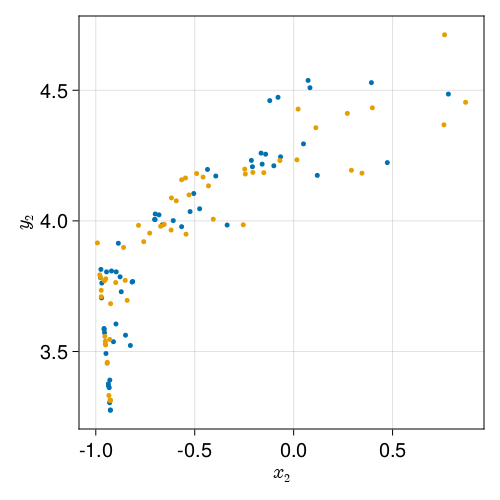

In [32]:
plane = (2, -4.0)
u0s = [
        [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0],
        [0.5, 0.2, 0.5, 0.5, 0.3, 0.5]
    ]


fig = Figure(resolution = (500,500), fontsize = 20)
ax1 = Axis(fig[1,1]; xlabel = L"x_2", ylabel = L"y_2")

for u0 in u0s
    psos = poincaresos(ds_HR1, plane,  n = 300000.0, Ttr  = 300000.0, u0 = u0;
                        diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000) )
    
    scatter!(ax1, psos[:, 1], psos[:, 3]; markersize = 5.0)
end
fig

## x1 = 0, plot k in x2 

In [54]:
ds = ds_HR1

pvalues = range(0.050, stop = 0.056, length = 5000)
i = 1
plane = (2, 0.0)
tf = 5000.0
tr = 5000.0
p_index = 10

10

In [55]:
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = 0.05
parameter = 0.05000120024004801
parameter = 0.05000240048009602
parameter = 0.05000360072014403
parameter = 0.05000480096019204
parameter = 0.05000600120024005
parameter = 0.05000720144028806
parameter = 0.050008401680336066
parameter = 0.050009601920384075
parameter = 0.050010802160432084
parameter = 0.05001200240048009
parameter = 0.0500132026405281
parameter = 0.05001440288057612
parameter = 0.05001560312062413
parameter = 0.05001680336067214
parameter = 0.050018003600720146
parameter = 0.050019203840768155
parameter = 0.050020404080816164
parameter = 0.05002160432086417
parameter = 0.05002280456091218
parameter = 0.05002400480096019
parameter = 0.0500252050410082
parameter = 0.05002640528105621
parameter = 0.05002760552110422
parameter = 0.05002880576115223
parameter = 0.05003000600120024
parameter = 0.05003120624124825
parameter = 0.05003240648129626
parameter = 0.05003360672134427
parameter = 0.05003480696139228
parameter = 0.05003600720144029
parameter = 0.05003

parameter = 0.050304860972194436
parameter = 0.05030606121224245
parameter = 0.05030726145229046
parameter = 0.05030846169233847
parameter = 0.05030966193238648
parameter = 0.05031086217243449
parameter = 0.0503120624124825
parameter = 0.050313262652530506
parameter = 0.050314462892578515
parameter = 0.050315663132626524
parameter = 0.05031686337267453
parameter = 0.05031806361272254
parameter = 0.05031926385277055
parameter = 0.05032046409281856
parameter = 0.05032166433286658
parameter = 0.050322864572914586
parameter = 0.050324064812962595
parameter = 0.050325265053010604
parameter = 0.05032646529305861
parameter = 0.05032766553310662
parameter = 0.05032886577315463
parameter = 0.05033006601320264
parameter = 0.05033126625325065
parameter = 0.05033246649329866
parameter = 0.05033366673334667
parameter = 0.050334866973394676
parameter = 0.050336067213442685
parameter = 0.0503372674534907
parameter = 0.05033846769353871
parameter = 0.05033966793358672
parameter = 0.05034086817363473
p

parameter = 0.05060852170434087
parameter = 0.050609721944388876
parameter = 0.050610922184436885
parameter = 0.050612122424484894
parameter = 0.0506133226645329
parameter = 0.05061452290458092
parameter = 0.05061572314462893
parameter = 0.05061692338467694
parameter = 0.050618123624724946
parameter = 0.050619323864772955
parameter = 0.050620524104820964
parameter = 0.050621724344868974
parameter = 0.05062292458491698
parameter = 0.05062412482496499
parameter = 0.050625325065013
parameter = 0.05062652530506101
parameter = 0.05062772554510902
parameter = 0.050628925785157035
parameter = 0.050630126025205044
parameter = 0.05063132626525305
parameter = 0.05063252650530106
parameter = 0.05063372674534907
parameter = 0.05063492698539708
parameter = 0.05063612722544509
parameter = 0.0506373274654931
parameter = 0.05063852770554111
parameter = 0.050639727945589116
parameter = 0.050640928185637125
parameter = 0.050642128425685135
parameter = 0.050643328665733144
parameter = 0.05064452890578116

parameter = 0.05091338267653531
parameter = 0.050914582916583316
parameter = 0.050915783156631325
parameter = 0.050916983396679334
parameter = 0.05091818363672734
parameter = 0.05091938387677535
parameter = 0.05092058411682336
parameter = 0.05092178435687138
parameter = 0.050922984596919386
parameter = 0.050924184836967396
parameter = 0.050925385077015405
parameter = 0.050926585317063414
parameter = 0.05092778555711142
parameter = 0.05092898579715943
parameter = 0.05093018603720744
parameter = 0.05093138627725545
parameter = 0.05093258651730346
parameter = 0.05093378675735147
parameter = 0.05093498699739948
parameter = 0.050936187237447486
parameter = 0.0509373874774955
parameter = 0.05093858771754351
parameter = 0.05093978795759152
parameter = 0.05094098819763953
parameter = 0.05094218843768754
parameter = 0.05094338867773555
parameter = 0.050944588917783556
parameter = 0.050945789157831566
parameter = 0.050946989397879575
parameter = 0.050948189637927584
parameter = 0.050949389877975

parameter = 0.05121824364872975
parameter = 0.051219443888777756
parameter = 0.051220644128825765
parameter = 0.051221844368873774
parameter = 0.05122304460892178
parameter = 0.05122424484896979
parameter = 0.0512254450890178
parameter = 0.05122664532906581
parameter = 0.05122784556911382
parameter = 0.051229045809161836
parameter = 0.051230246049209845
parameter = 0.051231446289257854
parameter = 0.05123264652930586
parameter = 0.05123384676935387
parameter = 0.05123504700940188
parameter = 0.05123624724944989
parameter = 0.0512374474894979
parameter = 0.05123864772954591
parameter = 0.05123984796959392
parameter = 0.051241048209641926
parameter = 0.051242248449689935
parameter = 0.051243448689737944
parameter = 0.05124464892978596
parameter = 0.05124584916983397
parameter = 0.05124704940988198
parameter = 0.05124824964992999
parameter = 0.051249449889978
parameter = 0.051250650130026006
parameter = 0.051251850370074015
parameter = 0.051253050610122024
parameter = 0.05125425085017003


parameter = 0.05152310462092419
parameter = 0.051524304860972196
parameter = 0.051525505101020205
parameter = 0.051526705341068214
parameter = 0.05152790558111622
parameter = 0.05152910582116423
parameter = 0.05153030606121224
parameter = 0.05153150630126025
parameter = 0.05153270654130826
parameter = 0.05153390678135627
parameter = 0.05153510702140428
parameter = 0.051536307261452294
parameter = 0.0515375075015003
parameter = 0.05153870774154831
parameter = 0.05153990798159632
parameter = 0.05154110822164433
parameter = 0.05154230846169234
parameter = 0.05154350870174035
parameter = 0.05154470894178836
parameter = 0.051545909181836366
parameter = 0.051547109421884375
parameter = 0.051548309661932384
parameter = 0.05154950990198039
parameter = 0.0515507101420284
parameter = 0.05155191038207642
parameter = 0.05155311062212443
parameter = 0.05155431086217244
parameter = 0.051555511102220446
parameter = 0.051556711342268455
parameter = 0.051557911582316464
parameter = 0.05155911182236447


parameter = 0.05182796559311862
parameter = 0.051829165833166636
parameter = 0.051830366073214645
parameter = 0.051831566313262654
parameter = 0.051832766553310664
parameter = 0.05183396679335867
parameter = 0.05183516703340668
parameter = 0.05183636727345469
parameter = 0.0518375675135027
parameter = 0.05183876775355071
parameter = 0.05183996799359872
parameter = 0.05184116823364673
parameter = 0.051842368473694736
parameter = 0.05184356871374275
parameter = 0.05184476895379076
parameter = 0.05184596919383877
parameter = 0.05184716943388678
parameter = 0.05184836967393479
parameter = 0.0518495699139828
parameter = 0.051850770154030806
parameter = 0.051851970394078815
parameter = 0.051853170634126824
parameter = 0.051854370874174834
parameter = 0.05185557111422284
parameter = 0.05185677135427085
parameter = 0.05185797159431886
parameter = 0.05185917183436688
parameter = 0.051860372074414886
parameter = 0.051861572314462895
parameter = 0.051862772554510904
parameter = 0.0518639727945589

parameter = 0.05213282656531306
parameter = 0.05213402680536107
parameter = 0.05213522704540908
parameter = 0.052136427285457095
parameter = 0.052137627525505104
parameter = 0.05213882776555311
parameter = 0.05214002800560112
parameter = 0.05214122824564913
parameter = 0.05214242848569714
parameter = 0.05214362872574515
parameter = 0.05214482896579316
parameter = 0.05214602920584117
parameter = 0.052147229445889176
parameter = 0.052148429685937185
parameter = 0.052149629925985194
parameter = 0.0521508301660332
parameter = 0.05215203040608122
parameter = 0.05215323064612923
parameter = 0.05215443088617724
parameter = 0.052155631126225246
parameter = 0.052156831366273256
parameter = 0.052158031606321265
parameter = 0.052159231846369274
parameter = 0.05216043208641728
parameter = 0.05216163232646529
parameter = 0.0521628325665133
parameter = 0.05216403280656131
parameter = 0.05216523304660932
parameter = 0.052166433286657335
parameter = 0.052167633526705344
parameter = 0.05216883376675335

parameter = 0.05243888777755551
parameter = 0.05244008801760352
parameter = 0.05244128825765153
parameter = 0.05244248849769954
parameter = 0.05244368873774755
parameter = 0.05244488897779556
parameter = 0.05244608921784357
parameter = 0.05244728945789158
parameter = 0.05244848969793959
parameter = 0.0524496899379876
parameter = 0.05245089017803561
parameter = 0.052452090418083616
parameter = 0.052453290658131625
parameter = 0.052454490898179634
parameter = 0.05245569113822764
parameter = 0.05245689137827565
parameter = 0.05245809161832366
parameter = 0.05245929185837168
parameter = 0.052460492098419687
parameter = 0.052461692338467696
parameter = 0.052462892578515705
parameter = 0.052464092818563714
parameter = 0.05246529305861172
parameter = 0.05246649329865973
parameter = 0.05246769353870774
parameter = 0.05246889377875575
parameter = 0.05247009401880376
parameter = 0.05247129425885177
parameter = 0.05247249449889978
parameter = 0.052473694738947786
parameter = 0.0524748949789958
pa

parameter = 0.05274374874974995
parameter = 0.05274494898979796
parameter = 0.05274614922984597
parameter = 0.05274734946989398
parameter = 0.052748549709941986
parameter = 0.052749749949989995
parameter = 0.05275095019003801
parameter = 0.05275215043008602
parameter = 0.05275335067013403
parameter = 0.05275455091018204
parameter = 0.05275575115023005
parameter = 0.052756951390278056
parameter = 0.052758151630326065
parameter = 0.052759351870374074
parameter = 0.05276055211042208
parameter = 0.05276175235047009
parameter = 0.0527629525905181
parameter = 0.05276415283056611
parameter = 0.05276535307061412
parameter = 0.052766553310662136
parameter = 0.052767753550710145
parameter = 0.052768953790758154
parameter = 0.05277015403080616
parameter = 0.05277135427085417
parameter = 0.05277255451090218
parameter = 0.05277375475095019
parameter = 0.0527749549909982
parameter = 0.05277615523104621
parameter = 0.05277735547109422
parameter = 0.052778555711142226
parameter = 0.052779755951190235


parameter = 0.05304860972194439
parameter = 0.0530498099619924
parameter = 0.05305101020204041
parameter = 0.05305221044208842
parameter = 0.053053410682136426
parameter = 0.053054610922184435
parameter = 0.053055811162232444
parameter = 0.05305701140228045
parameter = 0.05305821164232847
parameter = 0.05305941188237648
parameter = 0.05306061212242449
parameter = 0.053061812362472496
parameter = 0.053063012602520505
parameter = 0.053064212842568514
parameter = 0.053065413082616524
parameter = 0.05306661332266453
parameter = 0.05306781356271254
parameter = 0.05306901380276055
parameter = 0.05307021404280856
parameter = 0.05307141428285657
parameter = 0.05307261452290458
parameter = 0.053073814762952594
parameter = 0.0530750150030006
parameter = 0.05307621524304861
parameter = 0.05307741548309662
parameter = 0.05307861572314463
parameter = 0.05307981596319264
parameter = 0.05308101620324065
parameter = 0.05308221644328866
parameter = 0.053083416683336666
parameter = 0.053084616923384675


parameter = 0.05335347069413883
parameter = 0.05335467093418684
parameter = 0.05335587117423485
parameter = 0.05335707141428286
parameter = 0.053358271654330866
parameter = 0.053359471894378875
parameter = 0.053360672134426884
parameter = 0.05336187237447489
parameter = 0.0533630726145229
parameter = 0.05336427285457091
parameter = 0.05336547309461892
parameter = 0.053366673334666936
parameter = 0.053367873574714945
parameter = 0.053369073814762955
parameter = 0.053370274054810964
parameter = 0.05337147429485897
parameter = 0.05337267453490698
parameter = 0.05337387477495499
parameter = 0.053375075015003
parameter = 0.05337627525505101
parameter = 0.05337747549509902
parameter = 0.05337867573514703
parameter = 0.053379875975195036
parameter = 0.05338107621524305
parameter = 0.05338227645529106
parameter = 0.05338347669533907
parameter = 0.05338467693538708
parameter = 0.05338587717543509
parameter = 0.0533870774154831
parameter = 0.053388277655531106
parameter = 0.053389477895579115
pa

parameter = 0.053657131426285254
parameter = 0.05365833166633327
parameter = 0.05365953190638128
parameter = 0.05366073214642929
parameter = 0.0536619323864773
parameter = 0.053663132626525306
parameter = 0.053664332866573315
parameter = 0.053665533106621324
parameter = 0.05366673334666933
parameter = 0.05366793358671734
parameter = 0.05366913382676535
parameter = 0.05367033406681336
parameter = 0.05367153430686137
parameter = 0.05367273454690938
parameter = 0.053673934786957395
parameter = 0.053675135027005404
parameter = 0.05367633526705341
parameter = 0.05367753550710142
parameter = 0.05367873574714943
parameter = 0.05367993598719744
parameter = 0.05368113622724545
parameter = 0.05368233646729346
parameter = 0.05368353670734147
parameter = 0.053684736947389476
parameter = 0.053685937187437485
parameter = 0.053687137427485494
parameter = 0.0536883376675335
parameter = 0.05368953790758152
parameter = 0.05369073814762953
parameter = 0.05369193838767754
parameter = 0.053693138627725547


parameter = 0.0539631926385277
parameter = 0.05396439287857571
parameter = 0.05396559311862373
parameter = 0.05396679335867174
parameter = 0.053967993598719746
parameter = 0.053969193838767755
parameter = 0.053970394078815764
parameter = 0.05397159431886377
parameter = 0.05397279455891178
parameter = 0.05397399479895979
parameter = 0.0539751950390078
parameter = 0.05397639527905581
parameter = 0.05397759551910382
parameter = 0.05397879575915183
parameter = 0.05397999599919984
parameter = 0.05398119623924785
parameter = 0.05398239647929586
parameter = 0.05398359671934387
parameter = 0.05398479695939188
parameter = 0.05398599719943989
parameter = 0.0539871974394879
parameter = 0.05398839767953591
parameter = 0.053989597919583916
parameter = 0.053990798159631925
parameter = 0.053991998399679934
parameter = 0.05399319863972794
parameter = 0.05399439887977595
parameter = 0.05399559911982396
parameter = 0.05399679935987198
parameter = 0.05399799959991999
parameter = 0.053999199839967996
para

parameter = 0.05426805361072214
parameter = 0.05426925385077015
parameter = 0.05427045409081816
parameter = 0.05427165433086617
parameter = 0.054272854570914186
parameter = 0.054274054810962195
parameter = 0.054275255051010204
parameter = 0.054276455291058213
parameter = 0.05427765553110622
parameter = 0.05427885577115423
parameter = 0.05428005601120224
parameter = 0.05428125625125025
parameter = 0.05428245649129826
parameter = 0.05428365673134627
parameter = 0.05428485697139428
parameter = 0.054286057211442286
parameter = 0.054287257451490295
parameter = 0.05428845769153831
parameter = 0.05428965793158632
parameter = 0.05429085817163433
parameter = 0.05429205841168234
parameter = 0.05429325865173035
parameter = 0.054294458891778356
parameter = 0.054295659131826365
parameter = 0.054296859371874374
parameter = 0.054298059611922384
parameter = 0.05429925985197039
parameter = 0.0543004600920184
parameter = 0.05430166033206641
parameter = 0.05430286057211442
parameter = 0.05430406081216243

parameter = 0.05457291458291658
parameter = 0.05457411482296459
parameter = 0.0545753150630126
parameter = 0.05457651530306061
parameter = 0.05457771554310862
parameter = 0.05457891578315663
parameter = 0.05458011602320464
parameter = 0.054581316263252654
parameter = 0.05458251650330066
parameter = 0.05458371674334867
parameter = 0.05458491698339668
parameter = 0.05458611722344469
parameter = 0.0545873174634927
parameter = 0.05458851770354071
parameter = 0.05458971794358872
parameter = 0.054590918183636726
parameter = 0.054592118423684735
parameter = 0.054593318663732744
parameter = 0.05459451890378075
parameter = 0.05459571914382876
parameter = 0.05459691938387678
parameter = 0.05459811962392479
parameter = 0.054599319863972796
parameter = 0.054600520104020805
parameter = 0.054601720344068815
parameter = 0.054602920584116824
parameter = 0.05460412082416483
parameter = 0.05460532106421284
parameter = 0.05460652130426085
parameter = 0.05460772154430886
parameter = 0.05460892178435687
pa

parameter = 0.05487777555511102
parameter = 0.05487897579515903
parameter = 0.05488017603520704
parameter = 0.05488137627525505
parameter = 0.05488257651530306
parameter = 0.05488377675535107
parameter = 0.05488497699539908
parameter = 0.05488617723544709
parameter = 0.054887377475495096
parameter = 0.05488857771554311
parameter = 0.05488977795559112
parameter = 0.05489097819563913
parameter = 0.05489217843568714
parameter = 0.05489337867573515
parameter = 0.05489457891578316
parameter = 0.054895779155831166
parameter = 0.054896979395879175
parameter = 0.054898179635927184
parameter = 0.05489937987597519
parameter = 0.0549005801160232
parameter = 0.05490178035607121
parameter = 0.05490298059611922
parameter = 0.054904180836167236
parameter = 0.054905381076215246
parameter = 0.054906581316263255
parameter = 0.054907781556311264
parameter = 0.05490898179635927
parameter = 0.05491018203640728
parameter = 0.05491138227645529
parameter = 0.0549125825165033
parameter = 0.05491378275655131
pa

parameter = 0.05518263652730546
parameter = 0.05518383676735347
parameter = 0.05518503700740148
parameter = 0.05518623724744949
parameter = 0.0551874374874975
parameter = 0.05518863772754551
parameter = 0.05518983796759352
parameter = 0.05519103820764153
parameter = 0.055192238447689536
parameter = 0.055193438687737545
parameter = 0.055194638927785554
parameter = 0.05519583916783357
parameter = 0.05519703940788158
parameter = 0.05519823964792959
parameter = 0.0551994398879776
parameter = 0.055200640128025606
parameter = 0.055201840368073615
parameter = 0.055203040608121624
parameter = 0.05520424084816963
parameter = 0.05520544108821764
parameter = 0.05520664132826565
parameter = 0.05520784156831366
parameter = 0.05520904180836167
parameter = 0.05521024204840968
parameter = 0.055211442288457695
parameter = 0.055212642528505704
parameter = 0.05521384276855371
parameter = 0.05521504300860172
parameter = 0.05521624324864973
parameter = 0.05521744348869774
parameter = 0.05521864372874575
pa

parameter = 0.055487497499499897
parameter = 0.05548869773954791
parameter = 0.05548989797959592
parameter = 0.05549109821964393
parameter = 0.05549229845969194
parameter = 0.05549349869973995
parameter = 0.05549469893978796
parameter = 0.05549589917983597
parameter = 0.055497099419883976
parameter = 0.055498299659931985
parameter = 0.055499499899979994
parameter = 0.055500700140028
parameter = 0.05550190038007601
parameter = 0.05550310062012403
parameter = 0.05550430086017204
parameter = 0.055505501100220046
parameter = 0.055506701340268055
parameter = 0.055507901580316064
parameter = 0.055509101820364073
parameter = 0.05551030206041208
parameter = 0.05551150230046009
parameter = 0.0555127025405081
parameter = 0.05551390278055611
parameter = 0.05551510302060412
parameter = 0.05551630326065213
parameter = 0.05551750350070014
parameter = 0.05551870374074815
parameter = 0.05551990398079616
parameter = 0.05552110422084417
parameter = 0.05552230446089218
parameter = 0.05552350470094019
par

parameter = 0.05579235847169434
parameter = 0.055793558711742346
parameter = 0.055794758951790355
parameter = 0.05579595919183837
parameter = 0.05579715943188638
parameter = 0.05579835967193439
parameter = 0.0557995599119824
parameter = 0.05580076015203041
parameter = 0.055801960392078416
parameter = 0.055803160632126425
parameter = 0.055804360872174434
parameter = 0.05580556111222244
parameter = 0.05580676135227045
parameter = 0.05580796159231846
parameter = 0.05580916183236647
parameter = 0.05581036207241448
parameter = 0.055811562312462495
parameter = 0.055812762552510504
parameter = 0.055813962792558514
parameter = 0.05581516303260652
parameter = 0.05581636327265453
parameter = 0.05581756351270254
parameter = 0.05581876375275055
parameter = 0.05581996399279856
parameter = 0.05582116423284657
parameter = 0.05582236447289458
parameter = 0.055823564712942586
parameter = 0.055824764952990595
parameter = 0.05582596519303861
parameter = 0.05582716543308662
parameter = 0.05582836567313463

In [57]:
ds = ds_HR1

pvalues = range(0.050, stop = 0.056, length = 5000)
i = 4
plane = (2, 0.0)
tf = 5000.0
tr = 5000.0
p_index = 10

output1 = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = 0.05
parameter = 0.05000120024004801
parameter = 0.05000240048009602
parameter = 0.05000360072014403
parameter = 0.05000480096019204
parameter = 0.05000600120024005
parameter = 0.05000720144028806
parameter = 0.050008401680336066
parameter = 0.050009601920384075
parameter = 0.050010802160432084
parameter = 0.05001200240048009
parameter = 0.0500132026405281
parameter = 0.05001440288057612
parameter = 0.05001560312062413
parameter = 0.05001680336067214
parameter = 0.050018003600720146
parameter = 0.050019203840768155
parameter = 0.050020404080816164
parameter = 0.05002160432086417
parameter = 0.05002280456091218
parameter = 0.05002400480096019
parameter = 0.0500252050410082
parameter = 0.05002640528105621
parameter = 0.05002760552110422
parameter = 0.05002880576115223
parameter = 0.05003000600120024
parameter = 0.05003120624124825
parameter = 0.05003240648129626
parameter = 0.05003360672134427
parameter = 0.05003480696139228
parameter = 0.05003600720144029
parameter = 0.05003

parameter = 0.050304860972194436
parameter = 0.05030606121224245
parameter = 0.05030726145229046
parameter = 0.05030846169233847
parameter = 0.05030966193238648
parameter = 0.05031086217243449
parameter = 0.0503120624124825
parameter = 0.050313262652530506
parameter = 0.050314462892578515
parameter = 0.050315663132626524
parameter = 0.05031686337267453
parameter = 0.05031806361272254
parameter = 0.05031926385277055
parameter = 0.05032046409281856
parameter = 0.05032166433286658
parameter = 0.050322864572914586
parameter = 0.050324064812962595
parameter = 0.050325265053010604
parameter = 0.05032646529305861
parameter = 0.05032766553310662
parameter = 0.05032886577315463
parameter = 0.05033006601320264
parameter = 0.05033126625325065
parameter = 0.05033246649329866
parameter = 0.05033366673334667
parameter = 0.050334866973394676
parameter = 0.050336067213442685
parameter = 0.0503372674534907
parameter = 0.05033846769353871
parameter = 0.05033966793358672
parameter = 0.05034086817363473
p

parameter = 0.05060852170434087
parameter = 0.050609721944388876
parameter = 0.050610922184436885
parameter = 0.050612122424484894
parameter = 0.0506133226645329
parameter = 0.05061452290458092
parameter = 0.05061572314462893
parameter = 0.05061692338467694
parameter = 0.050618123624724946
parameter = 0.050619323864772955
parameter = 0.050620524104820964
parameter = 0.050621724344868974
parameter = 0.05062292458491698
parameter = 0.05062412482496499
parameter = 0.050625325065013
parameter = 0.05062652530506101
parameter = 0.05062772554510902
parameter = 0.050628925785157035
parameter = 0.050630126025205044
parameter = 0.05063132626525305
parameter = 0.05063252650530106
parameter = 0.05063372674534907
parameter = 0.05063492698539708
parameter = 0.05063612722544509
parameter = 0.0506373274654931
parameter = 0.05063852770554111
parameter = 0.050639727945589116
parameter = 0.050640928185637125
parameter = 0.050642128425685135
parameter = 0.050643328665733144
parameter = 0.05064452890578116

parameter = 0.05091338267653531
parameter = 0.050914582916583316
parameter = 0.050915783156631325
parameter = 0.050916983396679334
parameter = 0.05091818363672734
parameter = 0.05091938387677535
parameter = 0.05092058411682336
parameter = 0.05092178435687138
parameter = 0.050922984596919386
parameter = 0.050924184836967396
parameter = 0.050925385077015405
parameter = 0.050926585317063414
parameter = 0.05092778555711142
parameter = 0.05092898579715943
parameter = 0.05093018603720744
parameter = 0.05093138627725545
parameter = 0.05093258651730346
parameter = 0.05093378675735147
parameter = 0.05093498699739948
parameter = 0.050936187237447486
parameter = 0.0509373874774955
parameter = 0.05093858771754351
parameter = 0.05093978795759152
parameter = 0.05094098819763953
parameter = 0.05094218843768754
parameter = 0.05094338867773555
parameter = 0.050944588917783556
parameter = 0.050945789157831566
parameter = 0.050946989397879575
parameter = 0.050948189637927584
parameter = 0.050949389877975

parameter = 0.05121824364872975
parameter = 0.051219443888777756
parameter = 0.051220644128825765
parameter = 0.051221844368873774
parameter = 0.05122304460892178
parameter = 0.05122424484896979
parameter = 0.0512254450890178
parameter = 0.05122664532906581
parameter = 0.05122784556911382
parameter = 0.051229045809161836
parameter = 0.051230246049209845
parameter = 0.051231446289257854
parameter = 0.05123264652930586
parameter = 0.05123384676935387
parameter = 0.05123504700940188
parameter = 0.05123624724944989
parameter = 0.0512374474894979
parameter = 0.05123864772954591
parameter = 0.05123984796959392
parameter = 0.051241048209641926
parameter = 0.051242248449689935
parameter = 0.051243448689737944
parameter = 0.05124464892978596
parameter = 0.05124584916983397
parameter = 0.05124704940988198
parameter = 0.05124824964992999
parameter = 0.051249449889978
parameter = 0.051250650130026006
parameter = 0.051251850370074015
parameter = 0.051253050610122024
parameter = 0.05125425085017003


parameter = 0.05152310462092419
parameter = 0.051524304860972196
parameter = 0.051525505101020205
parameter = 0.051526705341068214
parameter = 0.05152790558111622
parameter = 0.05152910582116423
parameter = 0.05153030606121224
parameter = 0.05153150630126025
parameter = 0.05153270654130826
parameter = 0.05153390678135627
parameter = 0.05153510702140428
parameter = 0.051536307261452294
parameter = 0.0515375075015003
parameter = 0.05153870774154831
parameter = 0.05153990798159632
parameter = 0.05154110822164433
parameter = 0.05154230846169234
parameter = 0.05154350870174035
parameter = 0.05154470894178836
parameter = 0.051545909181836366
parameter = 0.051547109421884375
parameter = 0.051548309661932384
parameter = 0.05154950990198039
parameter = 0.0515507101420284
parameter = 0.05155191038207642
parameter = 0.05155311062212443
parameter = 0.05155431086217244
parameter = 0.051555511102220446
parameter = 0.051556711342268455
parameter = 0.051557911582316464
parameter = 0.05155911182236447


parameter = 0.05182796559311862
parameter = 0.051829165833166636
parameter = 0.051830366073214645
parameter = 0.051831566313262654
parameter = 0.051832766553310664
parameter = 0.05183396679335867
parameter = 0.05183516703340668
parameter = 0.05183636727345469
parameter = 0.0518375675135027
parameter = 0.05183876775355071
parameter = 0.05183996799359872
parameter = 0.05184116823364673
parameter = 0.051842368473694736
parameter = 0.05184356871374275
parameter = 0.05184476895379076
parameter = 0.05184596919383877
parameter = 0.05184716943388678
parameter = 0.05184836967393479
parameter = 0.0518495699139828
parameter = 0.051850770154030806
parameter = 0.051851970394078815
parameter = 0.051853170634126824
parameter = 0.051854370874174834
parameter = 0.05185557111422284
parameter = 0.05185677135427085
parameter = 0.05185797159431886
parameter = 0.05185917183436688
parameter = 0.051860372074414886
parameter = 0.051861572314462895
parameter = 0.051862772554510904
parameter = 0.0518639727945589

parameter = 0.05213282656531306
parameter = 0.05213402680536107
parameter = 0.05213522704540908
parameter = 0.052136427285457095
parameter = 0.052137627525505104
parameter = 0.05213882776555311
parameter = 0.05214002800560112
parameter = 0.05214122824564913
parameter = 0.05214242848569714
parameter = 0.05214362872574515
parameter = 0.05214482896579316
parameter = 0.05214602920584117
parameter = 0.052147229445889176
parameter = 0.052148429685937185
parameter = 0.052149629925985194
parameter = 0.0521508301660332
parameter = 0.05215203040608122
parameter = 0.05215323064612923
parameter = 0.05215443088617724
parameter = 0.052155631126225246
parameter = 0.052156831366273256
parameter = 0.052158031606321265
parameter = 0.052159231846369274
parameter = 0.05216043208641728
parameter = 0.05216163232646529
parameter = 0.0521628325665133
parameter = 0.05216403280656131
parameter = 0.05216523304660932
parameter = 0.052166433286657335
parameter = 0.052167633526705344
parameter = 0.05216883376675335

parameter = 0.0524376875375075
parameter = 0.05243888777755551
parameter = 0.05244008801760352
parameter = 0.05244128825765153
parameter = 0.05244248849769954
parameter = 0.05244368873774755
parameter = 0.05244488897779556
parameter = 0.05244608921784357
parameter = 0.05244728945789158
parameter = 0.05244848969793959
parameter = 0.0524496899379876
parameter = 0.05245089017803561
parameter = 0.052452090418083616
parameter = 0.052453290658131625
parameter = 0.052454490898179634
parameter = 0.05245569113822764
parameter = 0.05245689137827565
parameter = 0.05245809161832366
parameter = 0.05245929185837168
parameter = 0.052460492098419687
parameter = 0.052461692338467696
parameter = 0.052462892578515705
parameter = 0.052464092818563714
parameter = 0.05246529305861172
parameter = 0.05246649329865973
parameter = 0.05246769353870774
parameter = 0.05246889377875575
parameter = 0.05247009401880376
parameter = 0.05247129425885177
parameter = 0.05247249449889978
parameter = 0.052473694738947786
pa

parameter = 0.05274254850970194
parameter = 0.05274374874974995
parameter = 0.05274494898979796
parameter = 0.05274614922984597
parameter = 0.05274734946989398
parameter = 0.052748549709941986
parameter = 0.052749749949989995
parameter = 0.05275095019003801
parameter = 0.05275215043008602
parameter = 0.05275335067013403
parameter = 0.05275455091018204
parameter = 0.05275575115023005
parameter = 0.052756951390278056
parameter = 0.052758151630326065
parameter = 0.052759351870374074
parameter = 0.05276055211042208
parameter = 0.05276175235047009
parameter = 0.0527629525905181
parameter = 0.05276415283056611
parameter = 0.05276535307061412
parameter = 0.052766553310662136
parameter = 0.052767753550710145
parameter = 0.052768953790758154
parameter = 0.05277015403080616
parameter = 0.05277135427085417
parameter = 0.05277255451090218
parameter = 0.05277375475095019
parameter = 0.0527749549909982
parameter = 0.05277615523104621
parameter = 0.05277735547109422
parameter = 0.052778555711142226
p

parameter = 0.05304740948189638
parameter = 0.05304860972194439
parameter = 0.0530498099619924
parameter = 0.05305101020204041
parameter = 0.05305221044208842
parameter = 0.053053410682136426
parameter = 0.053054610922184435
parameter = 0.053055811162232444
parameter = 0.05305701140228045
parameter = 0.05305821164232847
parameter = 0.05305941188237648
parameter = 0.05306061212242449
parameter = 0.053061812362472496
parameter = 0.053063012602520505
parameter = 0.053064212842568514
parameter = 0.053065413082616524
parameter = 0.05306661332266453
parameter = 0.05306781356271254
parameter = 0.05306901380276055
parameter = 0.05307021404280856
parameter = 0.05307141428285657
parameter = 0.05307261452290458
parameter = 0.053073814762952594
parameter = 0.0530750150030006
parameter = 0.05307621524304861
parameter = 0.05307741548309662
parameter = 0.05307861572314463
parameter = 0.05307981596319264
parameter = 0.05308101620324065
parameter = 0.05308221644328866
parameter = 0.053083416683336666
p

parameter = 0.05335227045409082
parameter = 0.05335347069413883
parameter = 0.05335467093418684
parameter = 0.05335587117423485
parameter = 0.05335707141428286
parameter = 0.053358271654330866
parameter = 0.053359471894378875
parameter = 0.053360672134426884
parameter = 0.05336187237447489
parameter = 0.0533630726145229
parameter = 0.05336427285457091
parameter = 0.05336547309461892
parameter = 0.053366673334666936
parameter = 0.053367873574714945
parameter = 0.053369073814762955
parameter = 0.053370274054810964
parameter = 0.05337147429485897
parameter = 0.05337267453490698
parameter = 0.05337387477495499
parameter = 0.053375075015003
parameter = 0.05337627525505101
parameter = 0.05337747549509902
parameter = 0.05337867573514703
parameter = 0.053379875975195036
parameter = 0.05338107621524305
parameter = 0.05338227645529106
parameter = 0.05338347669533907
parameter = 0.05338467693538708
parameter = 0.05338587717543509
parameter = 0.0533870774154831
parameter = 0.053388277655531106
par

parameter = 0.053657131426285254
parameter = 0.05365833166633327
parameter = 0.05365953190638128
parameter = 0.05366073214642929
parameter = 0.0536619323864773
parameter = 0.053663132626525306
parameter = 0.053664332866573315
parameter = 0.053665533106621324
parameter = 0.05366673334666933
parameter = 0.05366793358671734
parameter = 0.05366913382676535
parameter = 0.05367033406681336
parameter = 0.05367153430686137
parameter = 0.05367273454690938
parameter = 0.053673934786957395
parameter = 0.053675135027005404
parameter = 0.05367633526705341
parameter = 0.05367753550710142
parameter = 0.05367873574714943
parameter = 0.05367993598719744
parameter = 0.05368113622724545
parameter = 0.05368233646729346
parameter = 0.05368353670734147
parameter = 0.053684736947389476
parameter = 0.053685937187437485
parameter = 0.053687137427485494
parameter = 0.0536883376675335
parameter = 0.05368953790758152
parameter = 0.05369073814762953
parameter = 0.05369193838767754
parameter = 0.053693138627725547


parameter = 0.053961992398479694
parameter = 0.0539631926385277
parameter = 0.05396439287857571
parameter = 0.05396559311862373
parameter = 0.05396679335867174
parameter = 0.053967993598719746
parameter = 0.053969193838767755
parameter = 0.053970394078815764
parameter = 0.05397159431886377
parameter = 0.05397279455891178
parameter = 0.05397399479895979
parameter = 0.0539751950390078
parameter = 0.05397639527905581
parameter = 0.05397759551910382
parameter = 0.05397879575915183
parameter = 0.05397999599919984
parameter = 0.05398119623924785
parameter = 0.05398239647929586
parameter = 0.05398359671934387
parameter = 0.05398479695939188
parameter = 0.05398599719943989
parameter = 0.0539871974394879
parameter = 0.05398839767953591
parameter = 0.053989597919583916
parameter = 0.053990798159631925
parameter = 0.053991998399679934
parameter = 0.05399319863972794
parameter = 0.05399439887977595
parameter = 0.05399559911982396
parameter = 0.05399679935987198
parameter = 0.05399799959991999
para

parameter = 0.054266853370674134
parameter = 0.05426805361072214
parameter = 0.05426925385077015
parameter = 0.05427045409081816
parameter = 0.05427165433086617
parameter = 0.054272854570914186
parameter = 0.054274054810962195
parameter = 0.054275255051010204
parameter = 0.054276455291058213
parameter = 0.05427765553110622
parameter = 0.05427885577115423
parameter = 0.05428005601120224
parameter = 0.05428125625125025
parameter = 0.05428245649129826
parameter = 0.05428365673134627
parameter = 0.05428485697139428
parameter = 0.054286057211442286
parameter = 0.054287257451490295
parameter = 0.05428845769153831
parameter = 0.05428965793158632
parameter = 0.05429085817163433
parameter = 0.05429205841168234
parameter = 0.05429325865173035
parameter = 0.054294458891778356
parameter = 0.054295659131826365
parameter = 0.054296859371874374
parameter = 0.054298059611922384
parameter = 0.05429925985197039
parameter = 0.0543004600920184
parameter = 0.05430166033206641
parameter = 0.0543028605721144

parameter = 0.054570514102820565
parameter = 0.054571714342868574
parameter = 0.05457291458291658
parameter = 0.05457411482296459
parameter = 0.0545753150630126
parameter = 0.05457651530306061
parameter = 0.05457771554310862
parameter = 0.05457891578315663
parameter = 0.05458011602320464
parameter = 0.054581316263252654
parameter = 0.05458251650330066
parameter = 0.05458371674334867
parameter = 0.05458491698339668
parameter = 0.05458611722344469
parameter = 0.0545873174634927
parameter = 0.05458851770354071
parameter = 0.05458971794358872
parameter = 0.054590918183636726
parameter = 0.054592118423684735
parameter = 0.054593318663732744
parameter = 0.05459451890378075
parameter = 0.05459571914382876
parameter = 0.05459691938387678
parameter = 0.05459811962392479
parameter = 0.054599319863972796
parameter = 0.054600520104020805
parameter = 0.054601720344068815
parameter = 0.054602920584116824
parameter = 0.05460412082416483
parameter = 0.05460532106421284
parameter = 0.05460652130426085


parameter = 0.054875375075015005
parameter = 0.054876575315063014
parameter = 0.05487777555511102
parameter = 0.05487897579515903
parameter = 0.05488017603520704
parameter = 0.05488137627525505
parameter = 0.05488257651530306
parameter = 0.05488377675535107
parameter = 0.05488497699539908
parameter = 0.05488617723544709
parameter = 0.054887377475495096
parameter = 0.05488857771554311
parameter = 0.05488977795559112
parameter = 0.05489097819563913
parameter = 0.05489217843568714
parameter = 0.05489337867573515
parameter = 0.05489457891578316
parameter = 0.054895779155831166
parameter = 0.054896979395879175
parameter = 0.054898179635927184
parameter = 0.05489937987597519
parameter = 0.0549005801160232
parameter = 0.05490178035607121
parameter = 0.05490298059611922
parameter = 0.054904180836167236
parameter = 0.054905381076215246
parameter = 0.054906581316263255
parameter = 0.054907781556311264
parameter = 0.05490898179635927
parameter = 0.05491018203640728
parameter = 0.05491138227645529

parameter = 0.055180236047209445
parameter = 0.055181436287257454
parameter = 0.05518263652730546
parameter = 0.05518383676735347
parameter = 0.05518503700740148
parameter = 0.05518623724744949
parameter = 0.0551874374874975
parameter = 0.05518863772754551
parameter = 0.05518983796759352
parameter = 0.05519103820764153
parameter = 0.055192238447689536
parameter = 0.055193438687737545
parameter = 0.055194638927785554
parameter = 0.05519583916783357
parameter = 0.05519703940788158
parameter = 0.05519823964792959
parameter = 0.0551994398879776
parameter = 0.055200640128025606
parameter = 0.055201840368073615
parameter = 0.055203040608121624
parameter = 0.05520424084816963
parameter = 0.05520544108821764
parameter = 0.05520664132826565
parameter = 0.05520784156831366
parameter = 0.05520904180836167
parameter = 0.05521024204840968
parameter = 0.055211442288457695
parameter = 0.055212642528505704
parameter = 0.05521384276855371
parameter = 0.05521504300860172
parameter = 0.05521624324864973


parameter = 0.05548509701940388
parameter = 0.05548629725945189
parameter = 0.055487497499499897
parameter = 0.05548869773954791
parameter = 0.05548989797959592
parameter = 0.05549109821964393
parameter = 0.05549229845969194
parameter = 0.05549349869973995
parameter = 0.05549469893978796
parameter = 0.05549589917983597
parameter = 0.055497099419883976
parameter = 0.055498299659931985
parameter = 0.055499499899979994
parameter = 0.055500700140028
parameter = 0.05550190038007601
parameter = 0.05550310062012403
parameter = 0.05550430086017204
parameter = 0.055505501100220046
parameter = 0.055506701340268055
parameter = 0.055507901580316064
parameter = 0.055509101820364073
parameter = 0.05551030206041208
parameter = 0.05551150230046009
parameter = 0.0555127025405081
parameter = 0.05551390278055611
parameter = 0.05551510302060412
parameter = 0.05551630326065213
parameter = 0.05551750350070014
parameter = 0.05551870374074815
parameter = 0.05551990398079616
parameter = 0.05552110422084417
par

parameter = 0.05578995799159832
parameter = 0.05579115823164633
parameter = 0.05579235847169434
parameter = 0.055793558711742346
parameter = 0.055794758951790355
parameter = 0.05579595919183837
parameter = 0.05579715943188638
parameter = 0.05579835967193439
parameter = 0.0557995599119824
parameter = 0.05580076015203041
parameter = 0.055801960392078416
parameter = 0.055803160632126425
parameter = 0.055804360872174434
parameter = 0.05580556111222244
parameter = 0.05580676135227045
parameter = 0.05580796159231846
parameter = 0.05580916183236647
parameter = 0.05581036207241448
parameter = 0.055811562312462495
parameter = 0.055812762552510504
parameter = 0.055813962792558514
parameter = 0.05581516303260652
parameter = 0.05581636327265453
parameter = 0.05581756351270254
parameter = 0.05581876375275055
parameter = 0.05581996399279856
parameter = 0.05582116423284657
parameter = 0.05582236447289458
parameter = 0.055823564712942586
parameter = 0.055824764952990595
parameter = 0.05582596519303861

In [60]:
output_summ = output + output1;

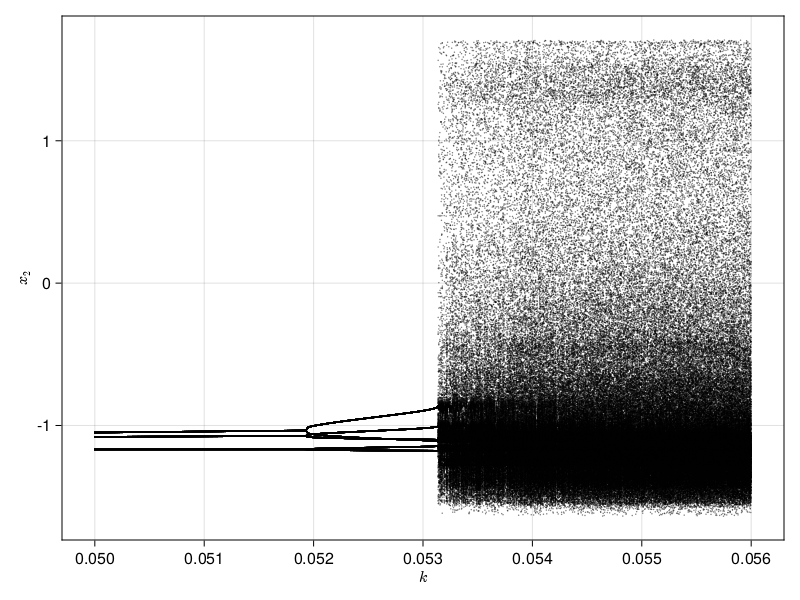

In [59]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_{2}")


for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 0.5), markersize = 1.5
    )
    
end
fig

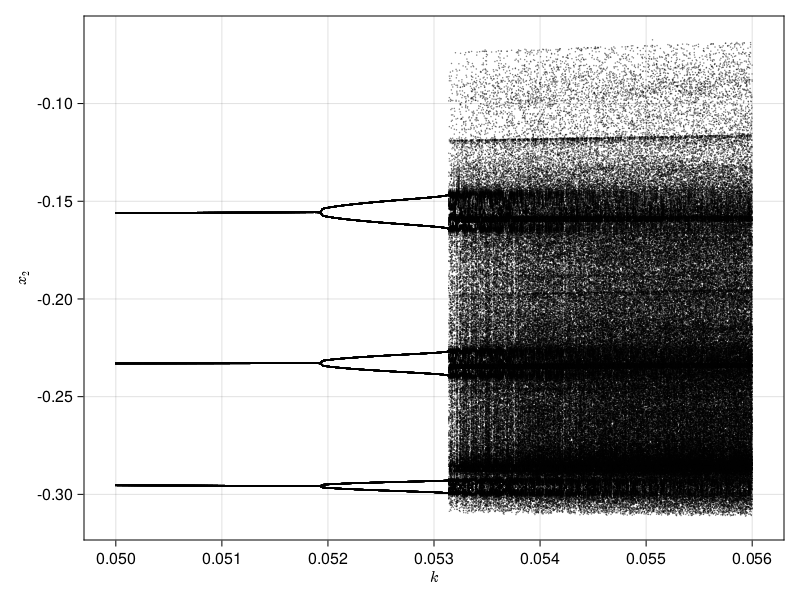

In [56]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_{2}")


for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
    
end
fig

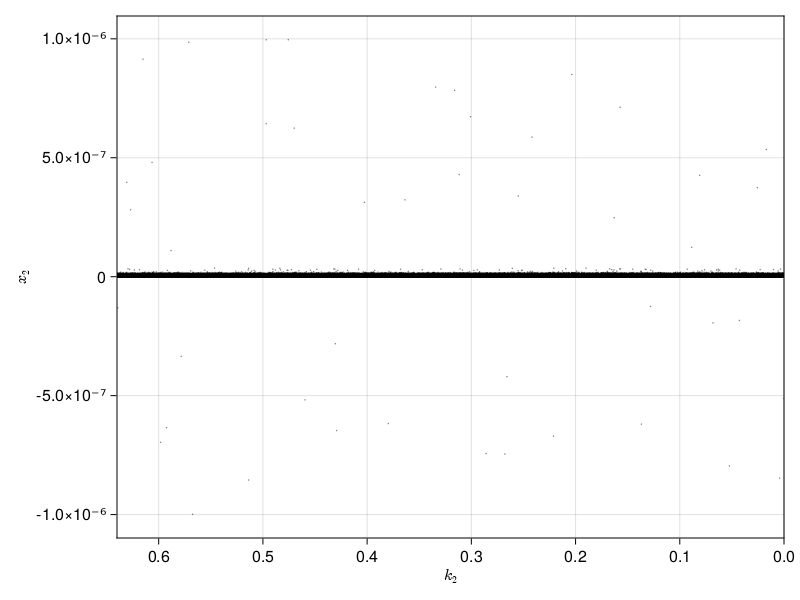

In [47]:
# from regular 
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.64, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

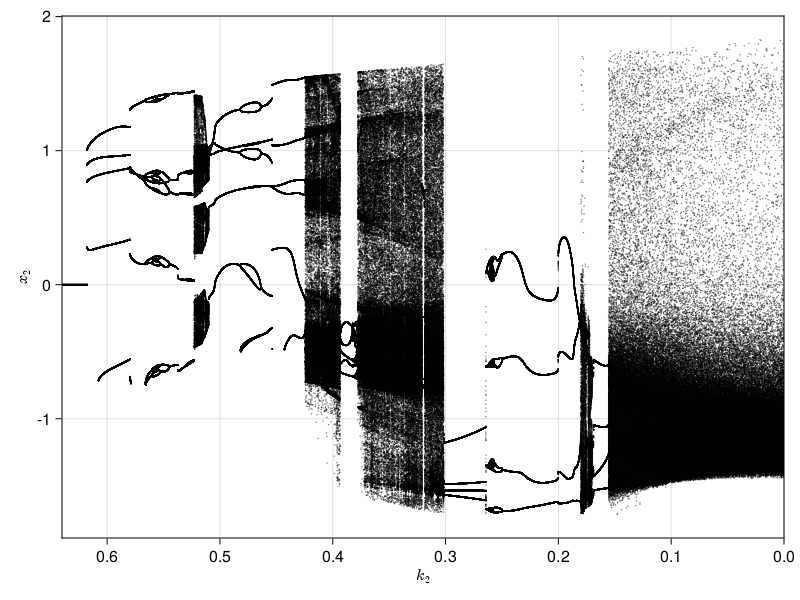

In [44]:
# from chaos 
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.64, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

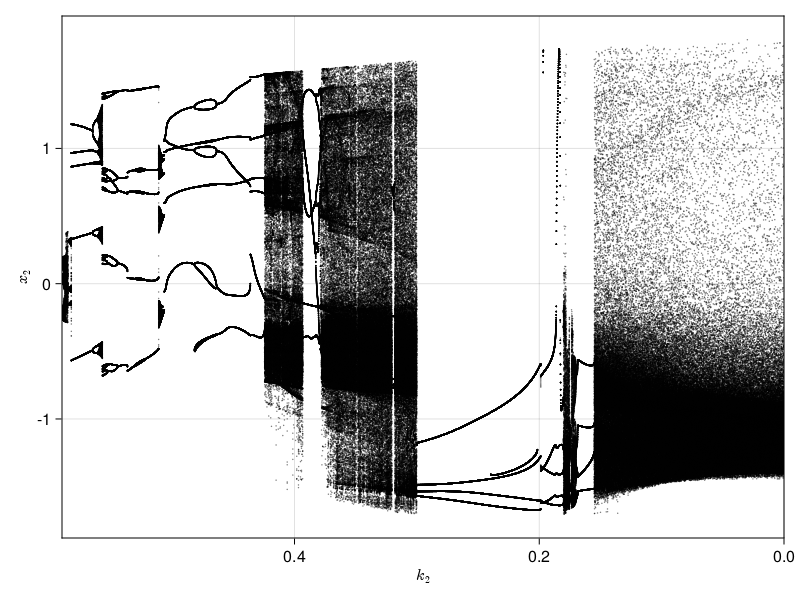

In [24]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.59, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

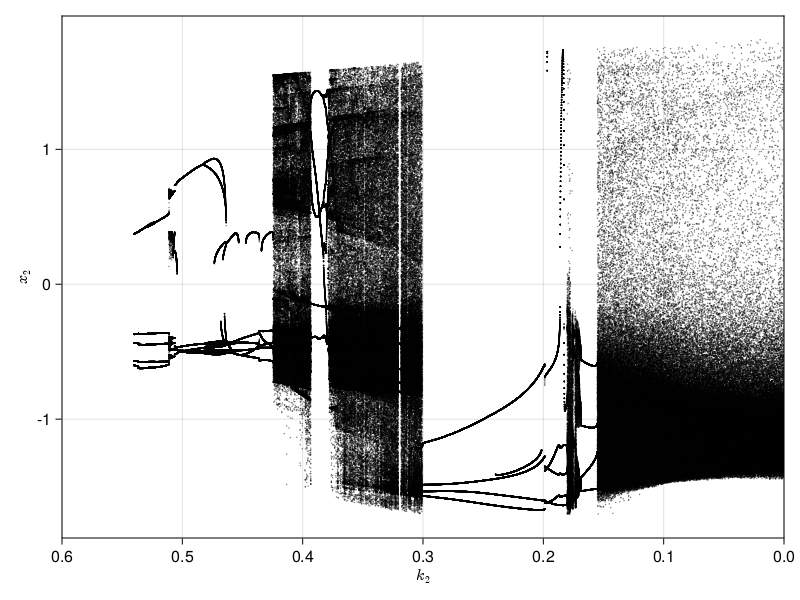

In [21]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.6, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

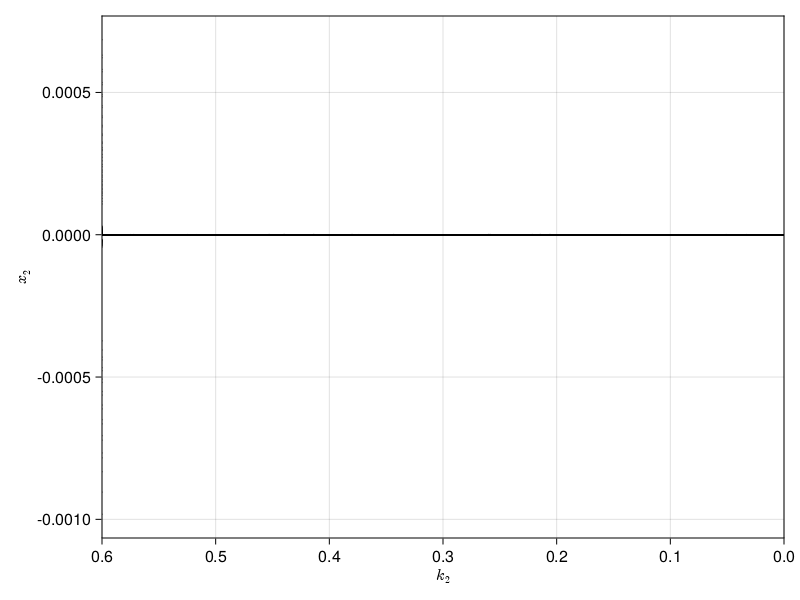

In [18]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.6, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

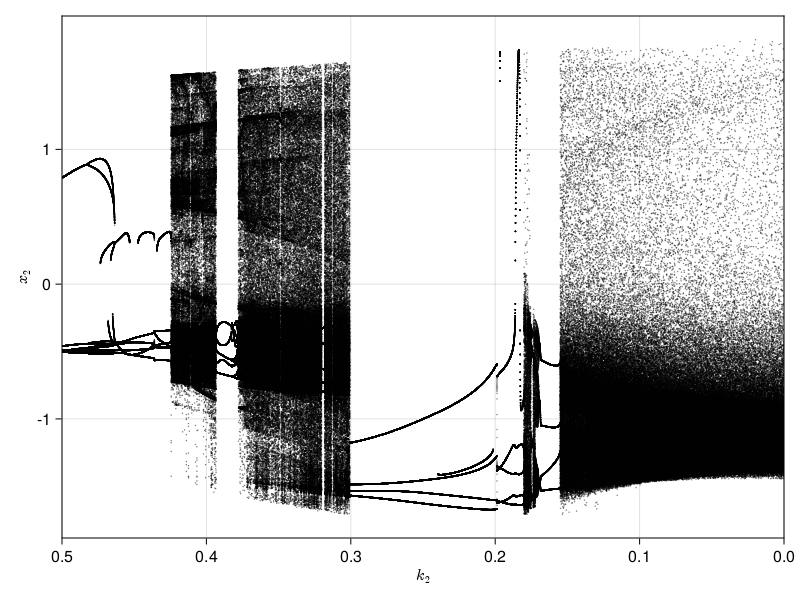

In [14]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.5, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

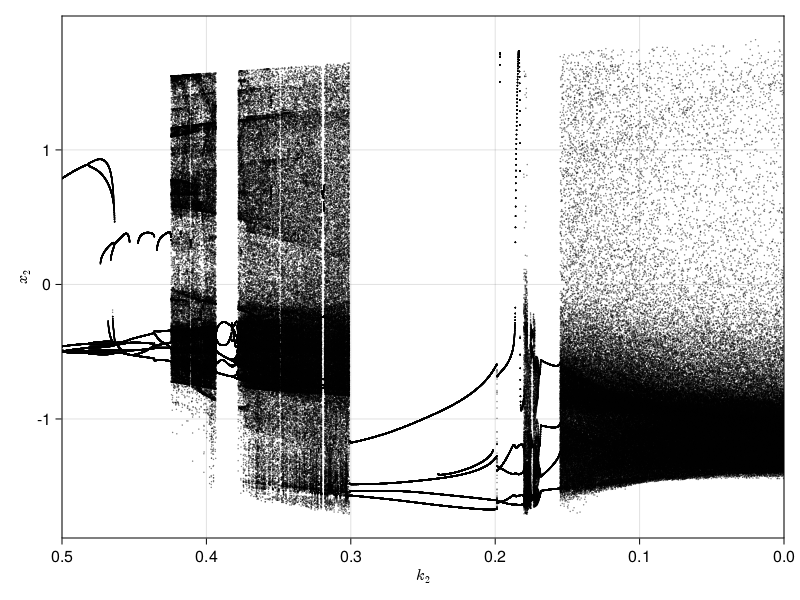

In [10]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.5, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

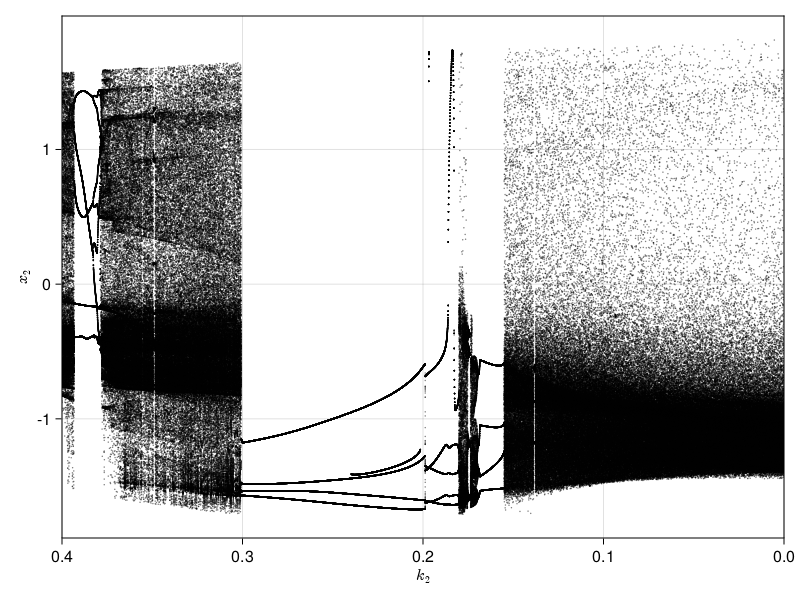

In [7]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

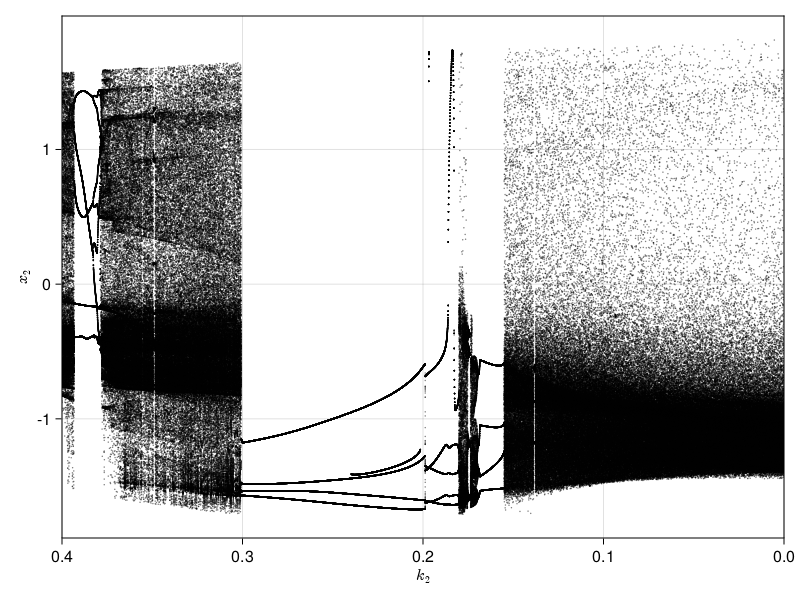

In [72]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

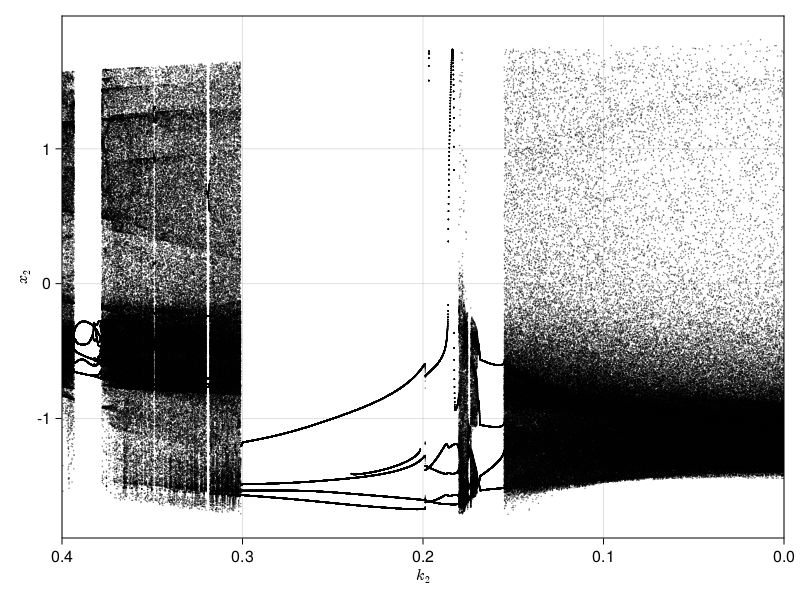

In [66]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

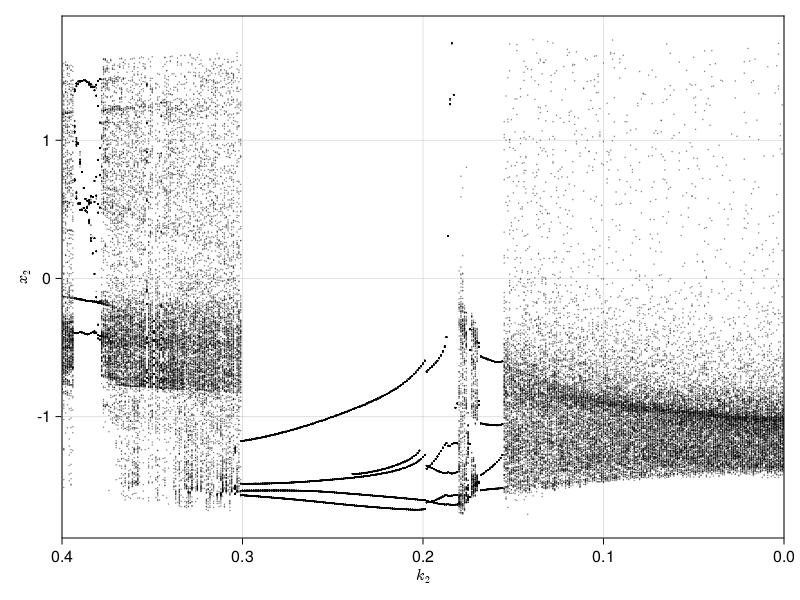

In [36]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.4, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

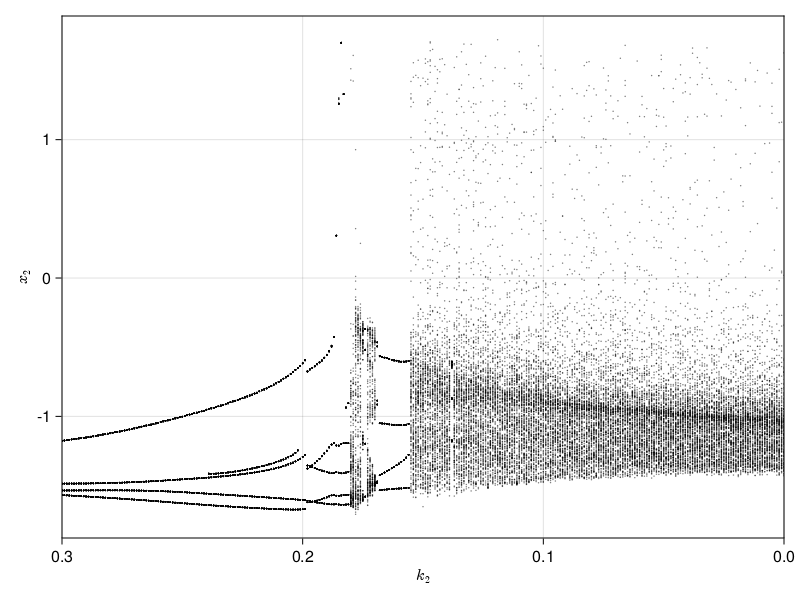

In [33]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.3, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

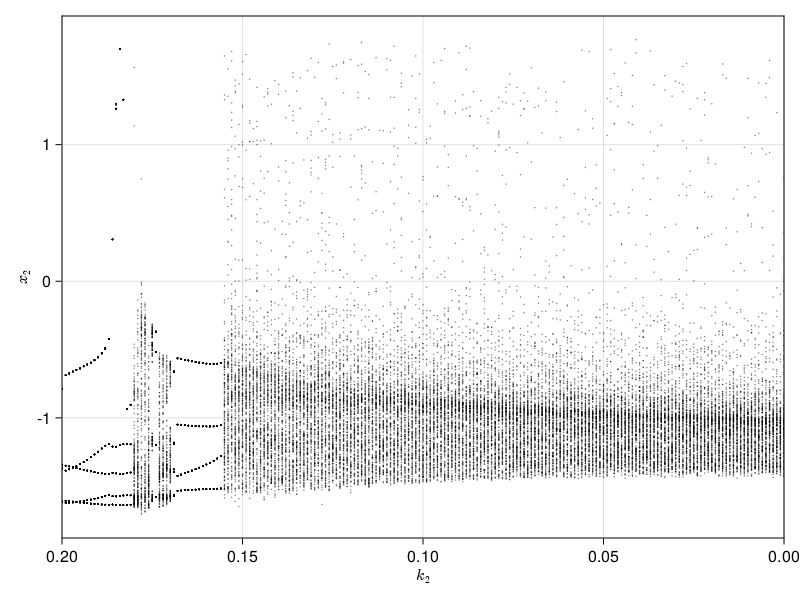

In [30]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{2}")
xlims!(ax, 0.2, 0.0)
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 1.5
    )
end
fig

In [22]:
pvalues = range(0.6, stop = 0, length = 500)
i = 4
plane = (1, 0.0)
tf = 50000.0
p_index = 12

12

12

## с хаотической траектории

In [23]:
output = produce_orbitdiagram(ds_HR1, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 25000.0, u0 = condition1;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

In [ ]:
fig = Figure(resolution = (1600, 600), fontsize = 20)
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 0.6, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.8
    )
end
fig

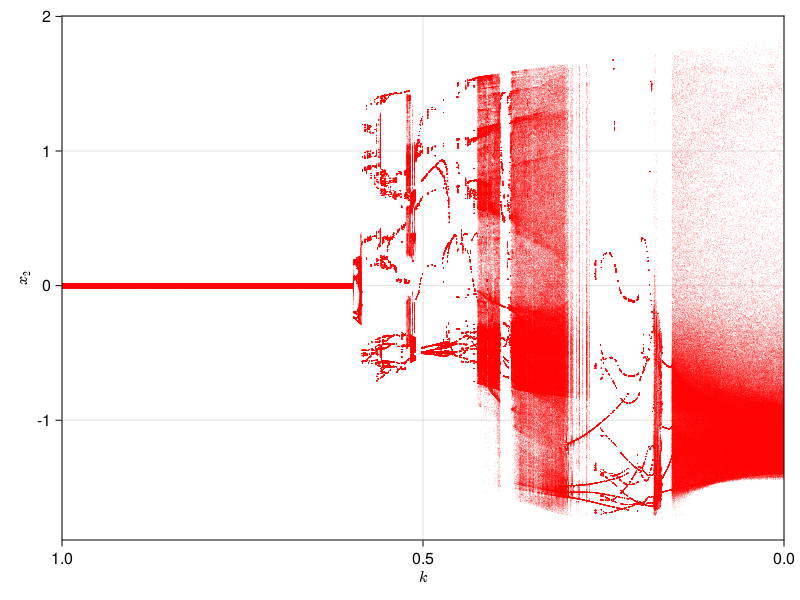

In [22]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("red", 0.5), markersize = 0.6
    )
end
fig

## с квазипериодической траектории

In [23]:
output1 = produce_orbitdiagram(ds_HR2, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 50000.0, u0 = condition2;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

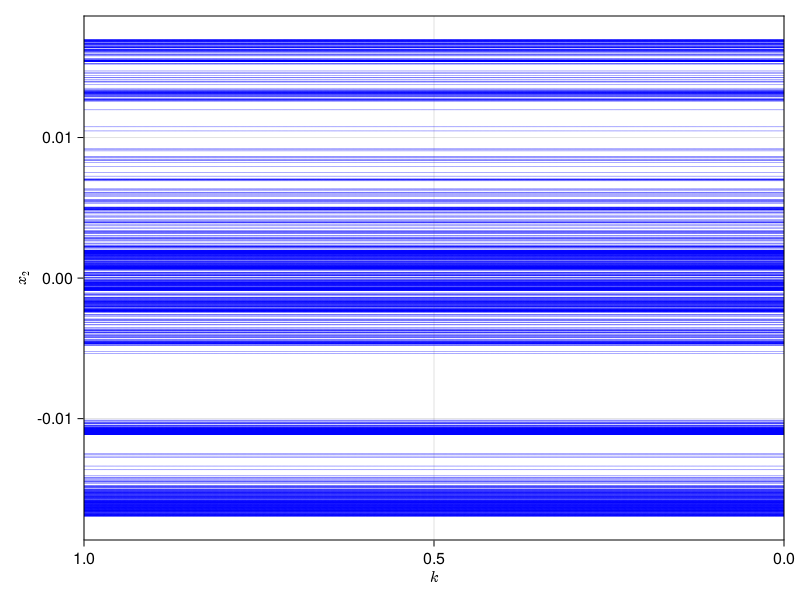

In [24]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("blue", 0.5), markersize = 0.6
    )
end
fig

## с обеих

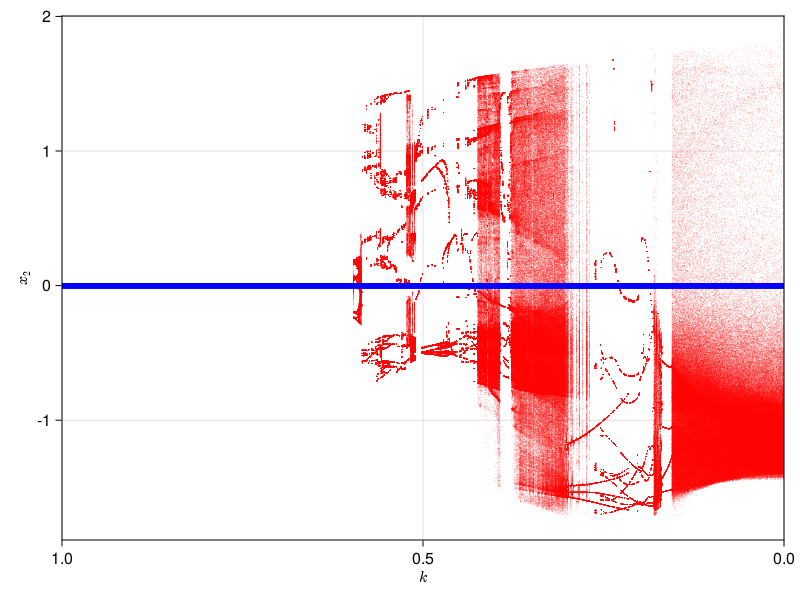

In [25]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)

for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("red", 0.5), markersize = 0.6
    )
end

for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output1[j])), output1[j];
        color = ("blue", 0.5), markersize = 0.6
    )
end

fig

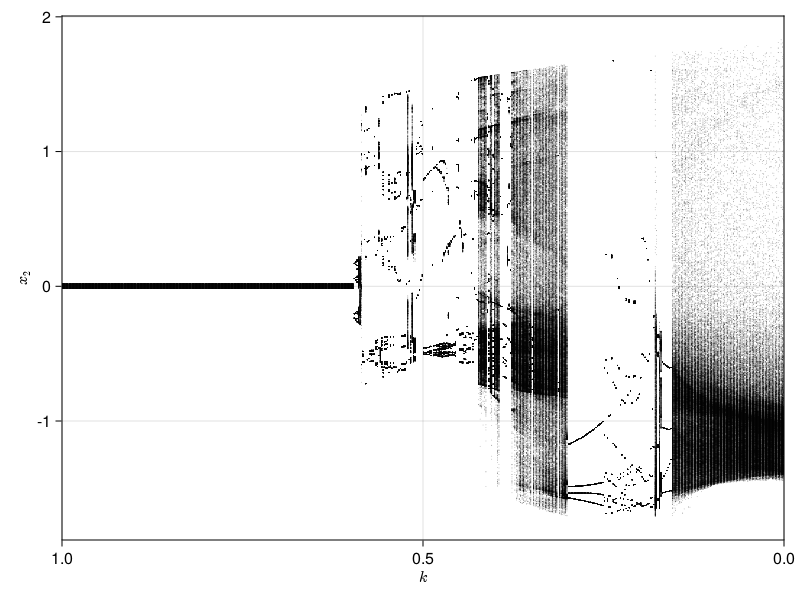

In [11]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

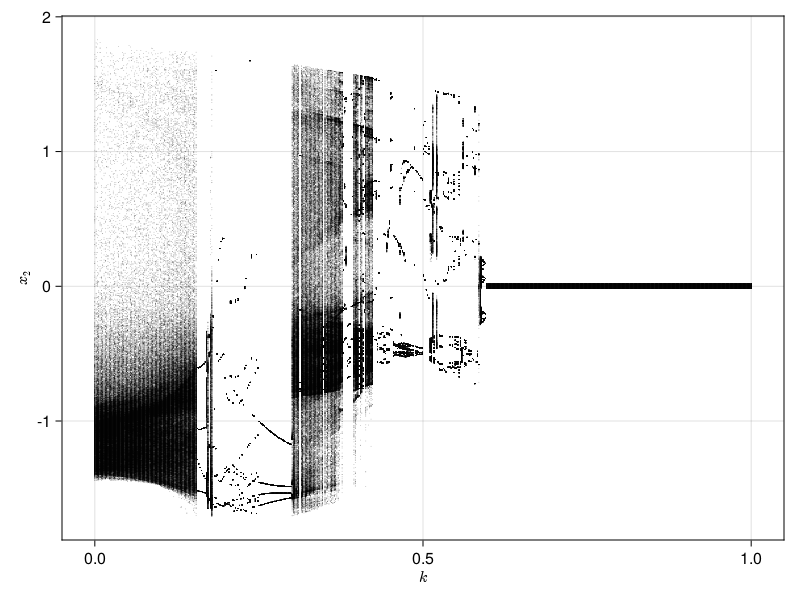

In [12]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

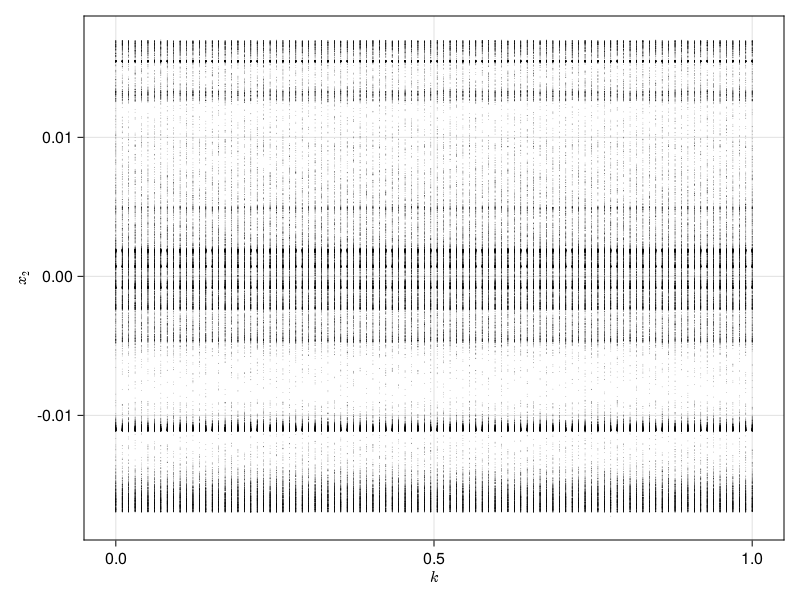

In [8]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues)
    
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

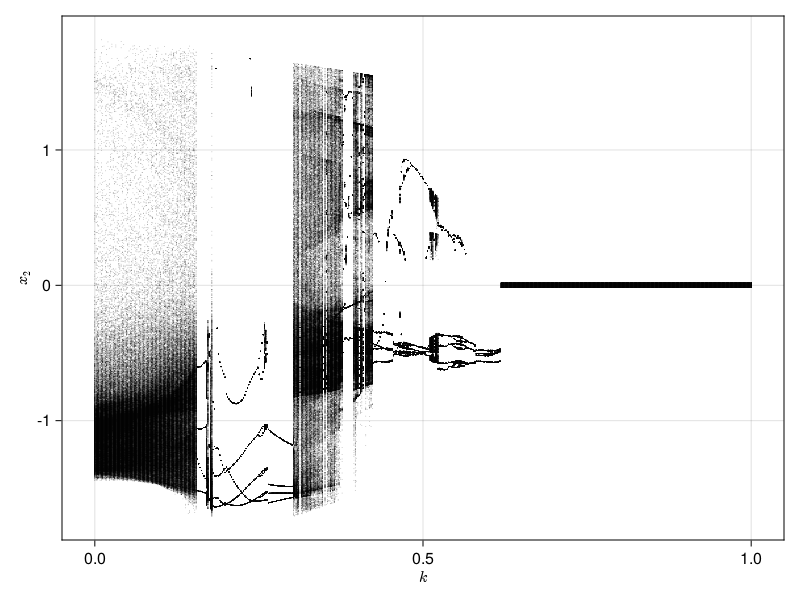

In [14]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_2")
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

## y1 = 0, plot k in x1

In [16]:
pvalues = range(0, stop = 1, length = 500)
i = 1

plane = (2, 0.0)
tf = 100000.0
p_index = 12

12

In [17]:
output = produce_orbitdiagram(ds_HR, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 50000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

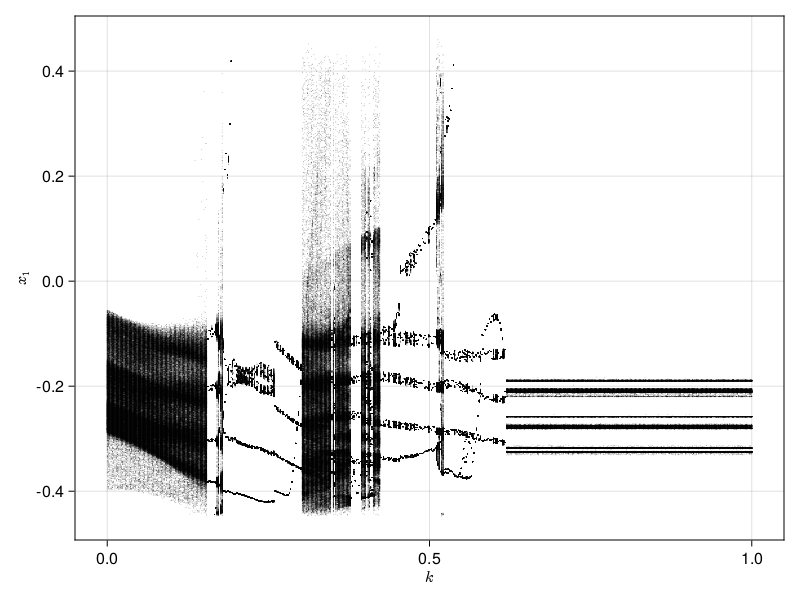

In [19]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_1")
for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig

In [6]:
pvalues = range(1, stop = 0, length = 100)
i = 1
plane = (2, 0.0)
tf = 100000.0
p_index = 12

12

In [7]:
output = produce_orbitdiagram(ds_HR, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = 50000.0;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

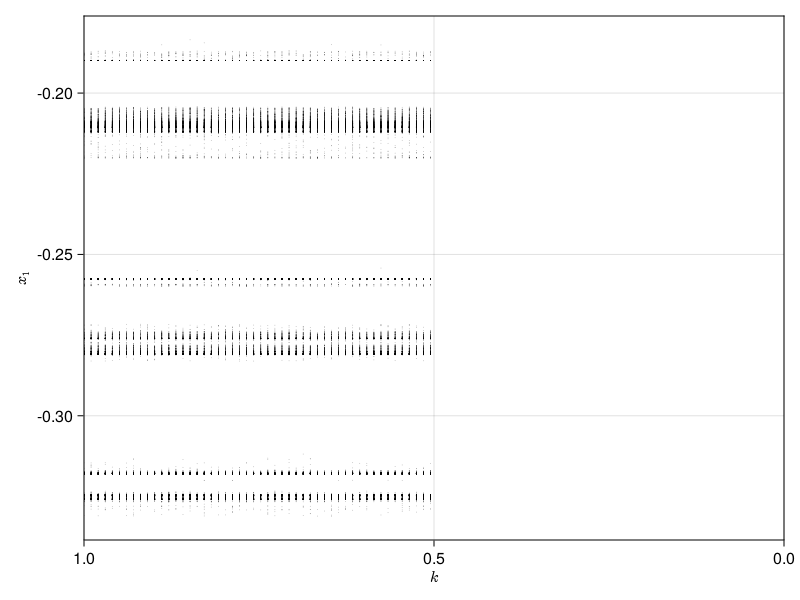

In [20]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"k", ylabel = L"x_1")
xlims!(ax, 1, 0)
for (j, p) in enumerate(pvalues[1:50])
    scatter!(ax, fill(p, length(output[j])), output[j];
        color = ("black", 0.5), markersize = 0.7
    )
end
fig